# This jupyter notebook is about the Assignment of MECC

This notebook refers to the Employee Attrition - Case Study assignment for the Data Scientist appointment.

The goal is to predict which employees will leave or stay at a company. Attrition is at a high cost for business. Thus, improvements can give significant results. Understanding the driving factors could eventually be useful to plan retetion schemes that improve employee satisfaction.  

To put it on context, when a employee leaves it affects the current productivity and the ongoing work. New candidate search or replacement search has not only hiring costs and training costs. It involves the cost of updating the new candidate so that it can catch up with the technical level or expertise that the left-employee had. 

My work will be divided in three main sections. The EDA, the modelling and the conclusions. 

In [3]:
%cd /home/bioinfo/Descargas/DataScienceCaseStudy/
#%cd /home/mecc/Downloads/DataScienceCaseStudy/
%ls

/home/bioinfo/Descargas/DataScienceCaseStudy
assignment.md*           lightgbm.pdf*            __MACOSX/
employee-attrition.csv*  links_and_questions.md*


In [4]:
#Importing the libraries and modules that I forsee I will be using
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from sklearn.feature_selection import SelectFromModel

from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix


%matplotlib inline

### EDA

First glance at employee-attrition.csv file. 
The main data source is the employee-attrition.csv file that contains 1470 HR entries. 
The target variable to predict is:
    Employee leaving the company. It's a binary variable described as "0=no, 1=yes" 

Load and inspect dataset to get a general idea of it.

In [5]:
employee_attrition = pd.read_csv('employee-attrition.csv')

In [6]:
employee_attrition.shape
type(employee_attrition)
employee_attrition.info()
#print(employee_attrition.isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
sorted(employee_attrition)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [8]:
employee_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
employee_attrition.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

The TARGET variable (attrition) is imbalanced.
Also, there are different types of variables: numeric, categorical, negative values are not seen, no null at all. 
I'll proceed with a bit more "manual" way of inspecting the data. Default methods from pandas. I'll try to see if I can identify importan variables, dectect outliers, or determine some structure. 

In [10]:
numeric_cols = employee_attrition.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = employee_attrition.select_dtypes(include=['object']).columns.tolist()

In [11]:
employee_attrition[numeric_cols].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [12]:
employee_attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
employee_attrition[categorical_cols]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [14]:
employee_attrition.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Count'>

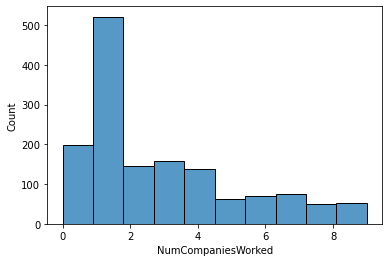

In [15]:
sns.histplot(employee_attrition['NumCompaniesWorked'], bins = 10, palette='viridis')

There are some features that do not change across the dataset, or that are "irrelevant" for modelling (i.e. Employee number as a long as it is randomly allocated, unless the employee number is associated to a specific condition)

In [16]:
# Drop features that do not change
employee_attrition = employee_attrition.drop(columns=['EmployeeCount' ,'EmployeeNumber', 'StandardHours', 'Over18'])
employee_attrition.shape

(1470, 31)

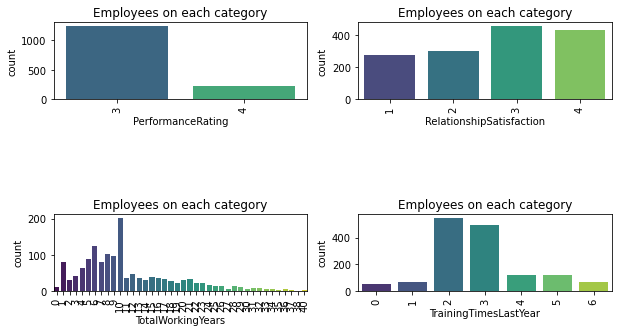

In [17]:
#General countplots
features=['PerformanceRating','RelationshipSatisfaction', 'TotalWorkingYears','TrainingTimesLastYear']
fig=plt.subplots(figsize=(10,12))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.5)
    sns.countplot(x=j,data = employee_attrition, palette='viridis')
    plt.xticks(rotation=90)
    plt.title("Employees on each category")

This data set can be grouped, the employees that attritted compared to those that stayed. I'll peek into the grouped dataset. I'll be looking at the mean.

In [18]:
Attrition = employee_attrition.groupby('Attrition')
Attrition.mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


I'll explore some features.

Text(0, 0.5, 'Active years')

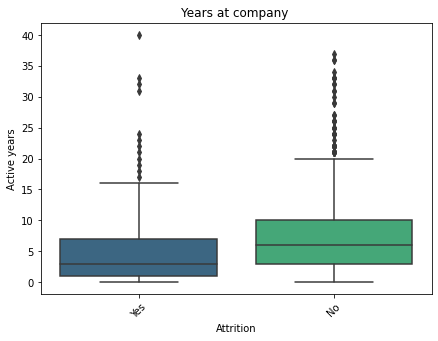

In [19]:
#Boxplot of active years vs attrite
f, ax = plt.subplots(figsize=(7, 5))
sns.set(style='darkgrid')
bpl=sns.boxplot(ax=ax, x='Attrition',y='YearsAtCompany',data=employee_attrition, palette='viridis')
bpl.set_xticklabels(ax.get_xticklabels(),rotation=45)
bpl.set_title('Years at company ')
bpl.set_ylabel('Active years')

In [20]:
employee_attrition.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [21]:
#EDUCATION FIELD and Attrition
Education_Attrite = pd.crosstab(index=employee_attrition.Attrition,
                               columns=employee_attrition.EducationField, 
                               margins=True)
Education_Attrite.index= ["Stayed","Left","Total"]
Education_Attrite
Education_Attrite/Education_Attrite.loc["Total"]*100

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Stayed,74.074074,85.313531,77.987421,86.422414,86.585366,75.757576,83.877551
Left,25.925926,14.686469,22.012579,13.577586,13.414634,24.242424,16.122449
Total,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


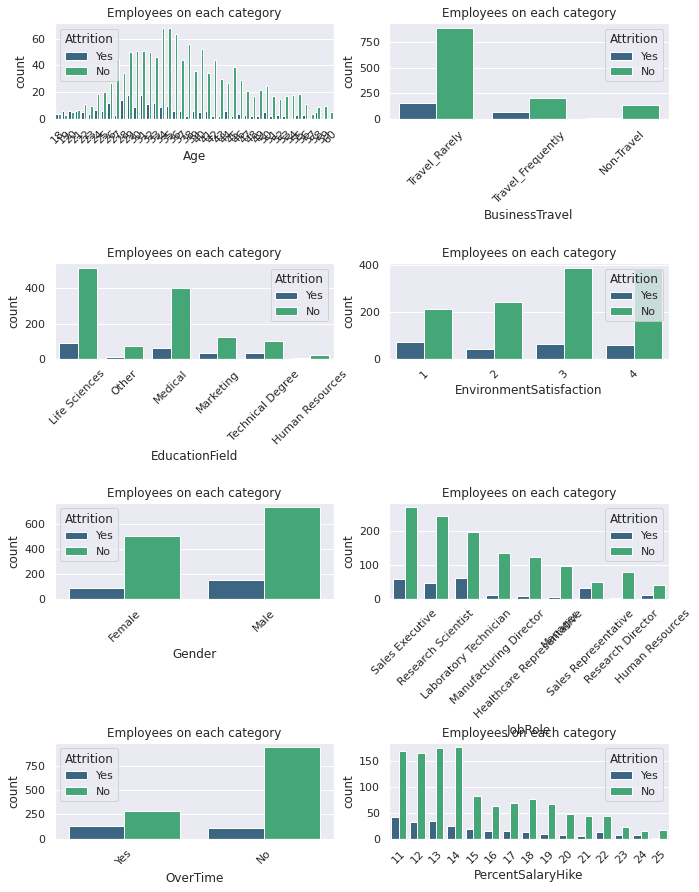

In [22]:
#Relation between some features and attrite 
features=['Age', 'BusinessTravel', 'EducationField','EnvironmentSatisfaction',
          'Gender', 'JobRole', 'OverTime', 'PercentSalaryHike']
fig=plt.subplots(figsize=(11,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.5)
    sns.countplot(x=j,data = employee_attrition, hue='Attrition', palette='viridis')
    plt.xticks(rotation=45)
    plt.title("Employees on each category")

Text(0.5, 1.0, 'Correlation heatmap all variables')

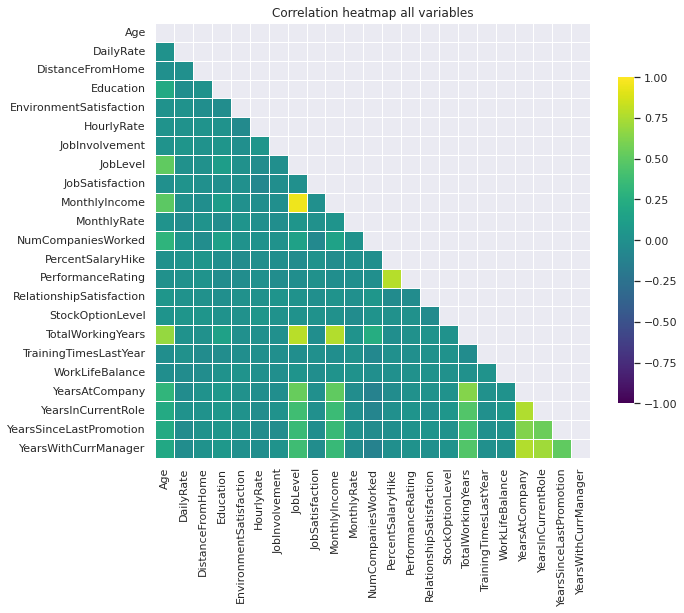

In [23]:
#Pearson correlation
corr = employee_attrition.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 8))
#cmap = sns.diverging_palette(255, 15, as_cmap=True)
cmap = plt.get_cmap("viridis")
hmp = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1,
                  cmap=cmap, center=0,
                  square=True, linewidths=.7, 
                  cbar_kws={"shrink": 0.75})
hmp.set_title('Correlation heatmap all variables')

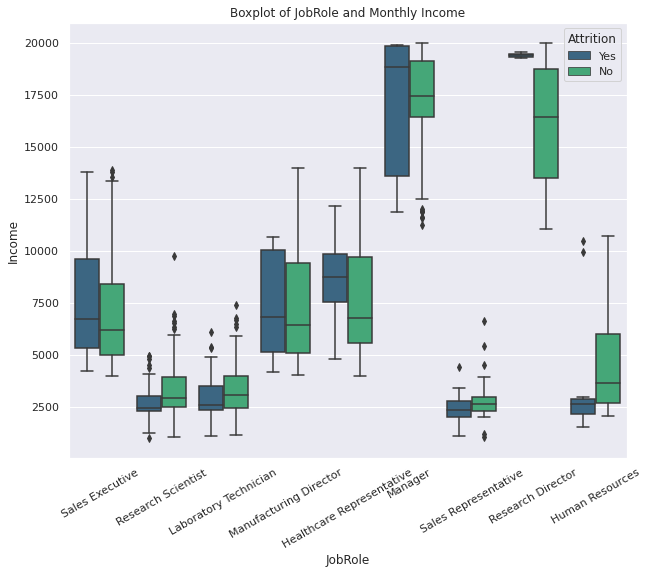

In [24]:
f, ax = plt.subplots(figsize=(10, 8))
sns.set(style="darkgrid")
bpl=sns.boxplot(ax=ax, x='JobRole',y='MonthlyIncome',hue='Attrition',
                data=employee_attrition, palette='viridis')
bpl.set_xticklabels(ax.get_xticklabels(),rotation=30)
bpl.set_title('Boxplot of JobRole and Monthly Income')
bpl.set_ylabel('Income');

These two following plots... 

## The EDA could be summarised in: 

There are 1475 observations with 35 features. There are two types of data: categorical(9) and numeric (26). 
Then, 4 of those features could be dropped as they don't contain "relevant" information for the matter. 

There is no missing data. 

The prediction target is imbalaced. 1233 of the employees stayed at their job, 237 left.

Some features have a highcorrelation. 

PCA in this step can help to see if there is an underlying structure.

In any case, I've chosen to follow a manual procedure, but depending on the case I would also apply the libraries: dataprep, pandasprofiling and sweetviz. 

## Unsupervised Clustering

Is there any underlying group between the employees that leave? (if any)

In [25]:
from sklearn.cluster import KMeans
# Peek into the group that attrite
left_emp =  employee_attrition[['Age','MonthlyIncome']][employee_attrition.Attrition == 'Yes'] 
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(left_emp)

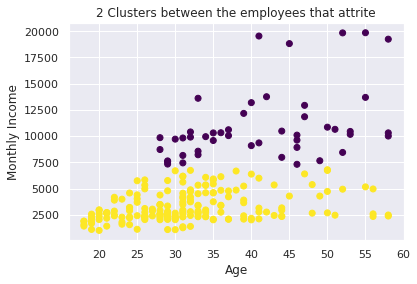

In [26]:
# Add Target and assign cluster labels.
left_emp['Target'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['Age'], left_emp['MonthlyIncome'], c=left_emp['Target'],cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.title('2 Clusters between the employees that attrite')
plt.show()

### I'll try with PCA, since its very common

In [27]:
#employee_attrition.head()

In [28]:
employee_attrition.DailyRate.value_counts()

691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64

In [29]:
#Remove target column, keep feature names
employee_transformed = employee_attrition.drop(['Attrition'], axis=1) 
features = employee_transformed.keys()
# Mutate target, new set
attrite_dict = {'Yes':1, 'No':0}
attrite = employee_attrition ['Attrition'].apply(lambda x: attrite_dict[x])
print(attrite)

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64


## I'm feature eingenieering, however there is huge room for improvement.  For instance, there are some variables that could be transformed in other meaningful ways (i.e. ratios)

In [30]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder

employee_transformed = employee_transformed.apply(LabelEncoder().fit_transform)
employee_transformed.DailyRate.value_counts()

382    6
190    5
268    5
775    5
609    5
      ..
352    1
113    1
138    1
137    1
336    1
Name: DailyRate, Length: 886, dtype: int64

In [31]:
employee_transformed = StandardScaler().fit_transform(employee_transformed)
#employee_transformed.shape
pd.DataFrame(employee_transformed).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.446350,0.590048,0.713914,1.401512,-1.010909,-0.891688,-0.937414,-0.660531,-1.224745,1.383138,...,-0.426230,-1.584178,-0.932014,-0.421735,-2.171982,-2.493820,-0.163801,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-1.302446,-0.493817,-0.147150,-1.868426,-0.937414,0.254625,0.816497,-0.240677,...,2.346151,1.191438,0.241988,-0.164441,0.155707,0.338096,0.497250,0.764998,-0.368715,0.806541
2,0.008343,0.590048,1.428124,-0.493817,-0.887515,-0.891688,1.316673,1.169781,0.816497,1.284725,...,-0.426230,-0.658973,-0.932014,-0.550382,0.155707,0.338096,-1.155378,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,1.487313,-0.493817,-0.764121,1.061787,-0.937414,1.169781,-1.224745,-0.486709,...,-0.426230,0.266233,-0.932014,-0.421735,0.155707,0.338096,0.166724,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.517210,-0.493817,-0.887515,-1.868426,0.565311,-1.575686,0.816497,-1.274014,...,-0.426230,1.191438,0.241988,-0.679030,0.155707,0.338096,-0.824853,-0.615492,-0.058285,-0.595227


In [32]:
#np.mean(employee_transformed), np.std(employee_transformed)

In [33]:
employee_zcore = pd.DataFrame(employee_transformed,columns=features)
employee_zcore.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.713914,1.401512,-1.010909,-0.891688,-0.937414,-0.660531,-1.224745,1.383138,...,-0.426230,-1.584178,-0.932014,-0.421735,-2.171982,-2.493820,-0.163801,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-1.302446,-0.493817,-0.147150,-1.868426,-0.937414,0.254625,0.816497,-0.240677,...,2.346151,1.191438,0.241988,-0.164441,0.155707,0.338096,0.497250,0.764998,-0.368715,0.806541
2,0.008343,0.590048,1.428124,-0.493817,-0.887515,-0.891688,1.316673,1.169781,0.816497,1.284725,...,-0.426230,-0.658973,-0.932014,-0.550382,0.155707,0.338096,-1.155378,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,1.487313,-0.493817,-0.764121,1.061787,-0.937414,1.169781,-1.224745,-0.486709,...,-0.426230,0.266233,-0.932014,-0.421735,0.155707,0.338096,0.166724,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.517210,-0.493817,-0.887515,-1.868426,0.565311,-1.575686,0.816497,-1.274014,...,-0.426230,1.191438,0.241988,-0.679030,0.155707,0.338096,-0.824853,-0.615492,-0.058285,-0.595227


In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pCs = pca.fit_transform(employee_zcore)
pcsDf = pd.DataFrame(data = pCs, 
                           columns = ['principal component 1', 
                                      'principal component 2'])
principal_pcas_df = pd.concat([pcsDf, employee_attrition [['Attrition']]], axis = 1)
principal_pcas_df.head()

,principal component 1,principal component 2,Attrition
0,-0.199008,0.327934,Yes
1,0.700994,-1.266294,No
2,-2.725873,1.107138,Yes
3,-0.901264,-0.423403,No
4,-1.874533,1.303368,No


In [35]:
#cmap = plt.get_cmap("viridis")
#rgba = cmap(2)
#print(rgba) 

THE PCA

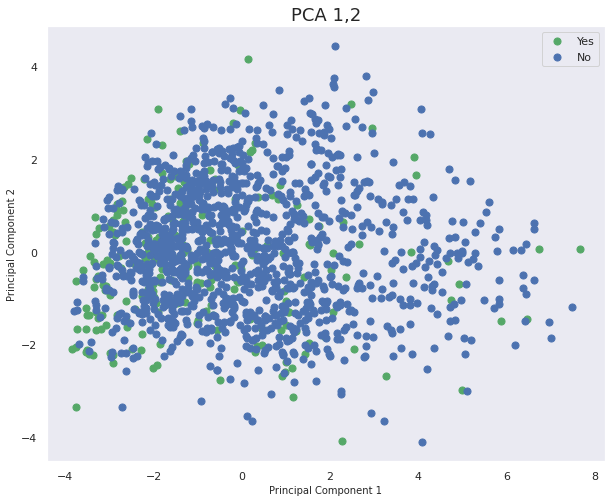

In [36]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('PCA 1,2', fontsize = 18)
targets = ['Yes', 'No']
colors = ['g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = principal_pcas_df['Attrition'] == target
    ax.scatter(principal_pcas_df.loc[indicesToKeep, 'principal component 1'], 
               principal_pcas_df.loc[indicesToKeep, 'principal component 2'],
               c = color, s = 50)
ax.legend(targets)
ax.grid()

At least for the two first components, by its representation the samples do not group according to variance. 

# Data Modeling

Prepare dataset for modeling. 

Create X,y format and split in train and test taking into account the unbalanced TARGET- Attrition

There is also de option to use StratifiedShuffleSplit from sklearn

https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_categorical.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-categorical-py

In [37]:
from sklearn.metrics import classification_report, precision_score, accuracy_score, confusion_matrix
def print_metrics_TT(model, X_train, X_test, Y_train, Y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("="*80)
    print("\tTraining Results")
    print("="*80)
    print(f"\tAccuracy {accuracy_score(Y_train,y_train_pred) * 100:20.3f}%")
    print(f"\tPrecision {precision_score(Y_train,y_train_pred) * 100:19.3f}%")
    print(f"\n\tClassification Report \n {classification_report(Y_train,y_train_pred)}")
    print(f"\tConfusion Matrix: \n {confusion_matrix(Y_train,y_train_pred)}\n")
    print("="*80)
    print("\tTesting Results")
    print("="*80)
    print(f"\tAccuracy {accuracy_score(Y_test,y_test_pred) * 100:20.3f}%")
    print(f"\tPrecision {precision_score(Y_test,y_test_pred) * 100:19.3f}%")
    print(f"\n\tClassification Report \n {classification_report(Y_test,y_test_pred)}")
    print(f"\tConfusion Matrix: \n {confusion_matrix(Y_test,y_test_pred)}\n")

In [38]:
# Split the data into 25% test and 75% training
X_train, X_test, Y_train, Y_test = train_test_split(employee_zcore, attrite,
                                                    test_size = 0.25, 
                                                    stratify = attrite, random_state = 1)
X_train.shape, X_test.shape

((1102, 30), (368, 30))

To consider for the imbalaced data set, I'll try 

- oversample using SMOTE synthetic oversampling of the minority class.
- could also downsample, but won't try this time. 

Eventhough I included SMOTE here, the prediction doesn't work very well, I wont use it. 


In [39]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(X_train,Y_train)

### PREDICT RESULTS WITH A RANDOM FOREST CLASIFFIER

A random forest is an esemble method that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [40]:
# Declare RF params (as in R)
seed = 0
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
    'criterion':'gini',
    'max_features': 0.3,
    'max_depth': 3,
    'min_samples_leaf': 5,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0, 
    'bootstrap':True
}

In [41]:
clf = RandomForestClassifier(**rf_params)

In [42]:
#clf.fit(smote_train, smote_target)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=5,
                       n_estimators=1000, n_jobs=-1, random_state=0)

In [43]:
clf_predictions = clf.predict(X_test)

In [44]:
#print_metrics_TT(clf,smote_train, X_test, smote_target, Y_test )
print_metrics_TT(clf,X_train, X_test, Y_train, Y_test )

	Training Results
	Accuracy               84.755%
	Precision             100.000%

	Classification Report 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       924
           1       1.00      0.06      0.11       178

    accuracy                           0.85      1102
   macro avg       0.92      0.53      0.51      1102
weighted avg       0.87      0.85      0.79      1102

	Confusion Matrix: 
 [[924   0]
 [168  10]]

	Testing Results
	Accuracy               83.967%
	Precision              50.000%

	Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       309
           1       0.50      0.03      0.06        59

    accuracy                           0.84       368
   macro avg       0.67      0.51      0.49       368
weighted avg       0.79      0.84      0.78       368

	Confusion Matrix: 
 [[307   2]
 [ 57   2]]



### FEATURE importance and SHAP values for this simple RF model

“The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance." (slikt-learn docs)
However, it doesnt explain wether the feature has a postive or negative impact. 

Text(0.5, 1.0, 'Feature Importance in simple Random Forest')

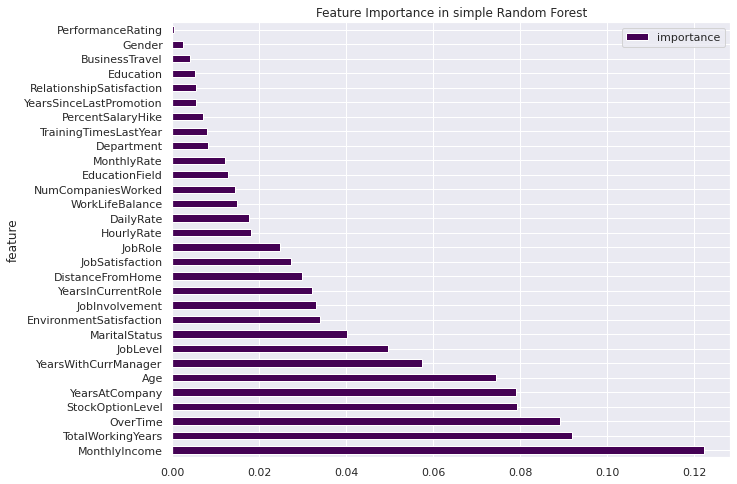

In [45]:
def feature_imp(df_X_test, model):
    ft_imp = pd.DataFrame()
    ft_imp["feature"] = df_X_test.columns
    ft_imp["importance"] = model.feature_importances_
    return ft_imp.sort_values(by="importance", ascending=False)

df = feature_imp(X_test, clf)
#print(df)
#cmap = plt.get_cmap('viridis')
#colors = cmap(np.linspace(0, 1, len(df.feature)))
#colors = [float(hash(s) % 256) / 256 for s in df.feature] 

df.set_index('feature', inplace=True)
df.plot.barh(figsize=(10, 8), cmap='viridis')
plt.title('Feature Importance in simple Random Forest')

In [46]:
#print(X_train.head())

In [47]:
import shap

####I'm following a tutorial on how to show SHAP values, literally. 
row_to_show = 5
data_for_prediction = X_test.iloc[row_to_show]  #Just One row of data
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

# Calculate Shap values
shap_explainer = shap.TreeExplainer(clf)
shap_values = shap_explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(shap_explainer.expected_value[1], shap_values[1], data_for_prediction)

The important information displayed in the above chart is:
    the base value (0.1621) represents the average probability for an employee to resign. This is the average contribution of all parameters within the model. We can consider it as a baseline.
    the individual value (0.11) represents the probability for random choosen employee (row 5) to leave the company, which is lower than the base value.
    the red parameters show which characteristics make the employee more likely to leave: MontlyRate, DistanceFromHome, JobSatisfaction (what ever that really means). The closer the parameters are from the individual value, the greater role they play in the prediction (the width on the chart for each parameter also provides this “importance” information).
    the blue parameters "explain" which elements decrease the probability of leaving: StockOptions, LessOverTime, MonthlyIncome, JobLevel... etc

In [48]:
row_to_show = 10
data_for_prediction = X_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
shap_values = shap_explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(shap_explainer.expected_value[1], shap_values[1], data_for_prediction)

Now let’s have a look at random choosen employee (row 10)  has a very different profile with a "higher" than average probability to attrite (0.18), overtimes, less stockoptions, marital status, companies worked... 

### Grid Search for Algorithm Tuning. 
A good practice step would be to do a RandomizedSearchCV to narrow down some parameters... (sort of), however, for the sake of this excercise I'll be directly doing a GridSearchCV

In [49]:
from sklearn.model_selection import GridSearchCV
#seed = 0
rf_params = {
    'n_estimators': [1000, 1200],
    'criterion':("gini", "entropy"),
    'max_features': ['auto','sqrt'],
    'max_depth':[3,5,7], 
#    'max_depth': (list(range(1, 12))),
    'min_samples_leaf': [2, 4],
    'min_samples_split' : [1, 3, 6],
    'random_state' : [0], 
    'bootstrap':[True, False]
}

model = RandomForestClassifier()
clf_gridcv = GridSearchCV(model, rf_params, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)

clf_gridcv.fit(X_train, Y_train)
grid_best = clf_gridcv.best_score_
best_params = clf_gridcv.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000, random_state=0; total time=   2.1s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, random_state=0; total time=   2.1s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, random_state=0; total time=   2.5s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=1000, random_state=0; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=1000, random_state=0; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=1000, random_state=0; total time=   2.4s[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, random_state=0; total time=   2.7s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1000, random_state=0; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1200, random_state=0; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1200, random_state=0; total time=   2.5s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, random_state=0; total ti

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, random_state=0; total time=   3.7s[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, random_state=0; total time=   2.1s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, random_state=0; total time=   2.5s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, random_state=0; total time=   2.5s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=1000, random_state=0; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000, random_state=0; total ti

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=1200, random_state=0; total time=   2.9s[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000, random_state=0; total time=   2.1s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=1200, random_state=0; total time=   2.9s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=1000, random_state=0; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=1200, random_state=0; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, random_state=0; total ti

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, random_state=0; total time=   2.9s[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1200, random_state=0; total time=   2.6s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, random_state=0; total time=   2.5s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=1000, random_state=0; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1000, random_state=0; total time=   2.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000, random_state=0; total ti

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, random_state=0; total time=   2.8s[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1200, random_state=0; total time=   2.6s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1000, random_state=0; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1200, random_state=0; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1200, random_state=0; total time=   2.5s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, random_state=0; total ti

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=1200, random_state=0; total time=   0.6s[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=1200, random_state=0; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1200, random_state=0; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=1000, random_state=0; total time=   3.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, random_state=0; total time=   2.8s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=1200, random_state=0; total ti

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, random_state=0; total time=   3.1s[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=1000, random_state=0; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, random_state=0; total time=   2.5s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1200, random_state=0; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000, random_state=0; total time=   2.2s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1000, random_state=0; total ti

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1200, random_state=0; total time=   3.8s[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=1200, random_state=0; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1000, random_state=0; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=1000, random_state=0; total time=   2.5s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000, random_state=0; total time=   2.1s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1200, random_state=0; total ti

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1000, random_state=0; total time=   2.4s[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=1000, random_state=0; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, random_state=0; total time=   2.5s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1000, random_state=0; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1000, random_state=0; total time=   2.1s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=1000, random_state=0; total ti

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, random_state=0; total time=   2.8s[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=1000, random_state=0; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1000, random_state=0; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1200, random_state=0; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=1000, random_state=0; total time=   2.2s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=1200, random_state=0; total ti

[CV] END bootstrap=False, criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, random_state=0; total time=   3.2s[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=1000, random_state=0; total time=   2.2s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=1200, random_state=0; total time=   2.5s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, random_state=0; total time=   2.8s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=1, n_estimators=1200, random_state=0; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, random_state=0; total ti

[CV] END bootstrap=False, criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1200, random_state=0; total time=   0.6s[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, random_state=0; total time=   2.1s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, random_state=0; total time=   2.1s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, random_state=0; total time=   2.1s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, random_state=0; total time=   2.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, random_state=0; total ti


288 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mecc/Apps/miniconda3/envs/Pythonbook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mecc/Apps/miniconda3/envs/Pythonbook/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/home/mecc/Apps/miniconda3/envs/Pythonbook/lib/python3.7/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/mecc/Apps/miniconda3/envs/Pythonbook/lib/pytho

In [50]:
print(f"\tGrid best score: {grid_best}")
print(f"\tGrid best parameters: {best_params}")

	Grid best score: 0.8548108438968526
	Grid best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 1000, 'random_state': 0}


In [51]:
clf = RandomForestClassifier(**best_params)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=3,
                       n_estimators=1000, random_state=0)

In [52]:
print_metrics_TT(clf,X_train, X_test, Y_train, Y_test )

	Training Results
	Accuracy               88.566%
	Precision             100.000%

	Classification Report 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       924
           1       1.00      0.29      0.45       178

    accuracy                           0.89      1102
   macro avg       0.94      0.65      0.69      1102
weighted avg       0.90      0.89      0.86      1102

	Confusion Matrix: 
 [[924   0]
 [126  52]]

	Testing Results
	Accuracy               85.598%
	Precision              71.429%

	Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       309
           1       0.71      0.17      0.27        59

    accuracy                           0.86       368
   macro avg       0.79      0.58      0.60       368
weighted avg       0.84      0.86      0.82       368

	Confusion Matrix: 
 [[305   4]
 [ 49  10]]



### PREDICT RESULTS WITH XGBOOST

In [53]:
from xgboost import XGBClassifier, XGBRegressor

seed = 0
xgbc_params = {
    'n_jobs': 2,
    'n_estimators': 1000,
    'learning_rate' : 0.05,
}
clf = XGBClassifier(**xgbc_params)
##clf = XGBRegressor(**xgbc_params)

In [54]:
clf.fit(X_train, Y_train)

[15:28:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
clf_predictions = clf.predict(X_test)

In [56]:
print_metrics_TT(clf,X_train, X_test, Y_train, Y_test )

	Training Results
	Accuracy              100.000%
	Precision             100.000%

	Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       924
           1       1.00      1.00      1.00       178

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

	Confusion Matrix: 
 [[924   0]
 [  0 178]]

	Testing Results
	Accuracy               86.141%
	Precision              63.333%

	Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       309
           1       0.63      0.32      0.43        59

    accuracy                           0.86       368
   macro avg       0.76      0.64      0.67       368
weighted avg       0.84      0.86      0.84       368

	Confusion Matrix: 
 [[298  11]
 [ 40  19]]



In [57]:
xgb_cfl = XGBClassifier(n_jobs = -1)


# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200],
        'learning_rate' : [0.05, 0.1],
        'min_child_weight': [1, 5, 7],
        'gamma': [0.1, 0.5, 1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [3, 4, 5],
        }
#params = {
#    'n_estimators' : [100, 200, 500, 750],
#    'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
#    'min_child_weight': [1, 5, 7, 10],
#    'gamma': [0.1, 0.5, 1, 1.5, 5],
#    'subsample': [0.6, 0.8, 1.0],
#    'colsample_bytree': [0.6, 0.8, 1.0],
#    'max_depth': [3, 4, 5, 10, 12]
# }

param_comb = 800

xgb_random_search = GridSearchCV(xgb_cfl, params, scoring='accuracy', cv=3, verbose=3)
xgb_random_search.fit(X_train, Y_train)
#GridSearchCV(model, rf_params, scoring="f1", cv=3, verbose=2, n_jobs=-1)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[15:28:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.867 total time=   0.1s
[15:28:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsa

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:28:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.859 total time=   0.1s
[15:28:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.870 total time=   0.1s
[15:28:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.2s
[15:28:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.1s
[15:28:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.867 total time=   0.1s
[15:28:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.1s
[15:28:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.858 total time=   0.1s
[15:28:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:28:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.850 total time=   0.1s
[15:28:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.1s
[15:28:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.850 total time=   0.1s
[15:28:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.1s
[15:28:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.877 total time=   0.1s
[15:28:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.2s
[15:28:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.4s
[15:28:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.858 total time=   0.1s
[15:28:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.858 total time=   0.1s
[15:28:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.853 total time=   0.1s
[15:28:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.853 total time=   0.1s
[15:28:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.867 total time=   0.1s
[15:28:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.1s
[15:28:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.1s
[15:28:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.1s
[15:28:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.1s
[15:28:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:28:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.867 total time=   0.1s
[15:28:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.858 total time=   0.1s
[15:28:41] WARNING: /h

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:28:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.853 total time=   0.1s
[15:28:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.853 total time=   0.1s
[15:28:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.2s
[15:28:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.2s
[15:28:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.853 total time=   0.2s
[15:28:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.1s
[15:28:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.875 total time=   0.1s
[15:28:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.1s
[15:28:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:28:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.858 total time=   0.1s
[15:28:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.853 total time=   0.1s
[15:28:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:28:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:28:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.1s
[15:28:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.1s
[15:28:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.875 total time=   0.1s
[15:28:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.1s
[15:28:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.858 total time=   0.1s
[15:28:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.858 total time=   0.1s
[15:28:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:28:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:28:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.2s
[15:28:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.1s
[15:28:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.1s
[15:28:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.867 total time=   0.1s
[15:28:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.869 total time=   0.1s
[15:28:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.1s
[15:28:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:28:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.856 total time=   0.1s
[15:28:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.851 total time=   0.1s
[15:28:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.858 total time=   0.1s
[15:28:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.2s
[15:28:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.2s
[15:28:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.2s
[15:28:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.859 total time=   0.2s
[15:28:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.850 total time=   0.2s
[15:28:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.2s
[15:28:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:28:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.2s
[15:28:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:28:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:28:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:28:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.867 total time=   0.1s
[15:28:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.2s
[15:28:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.1s
[15:28:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.1s
[15:28:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.1s
[15:28:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.1s
[15:28:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:28:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.856 total time=   0.1s
[15:28:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.870 total time=   0.1s
[15:28:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.847 total time=   0.1s
[15:28:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:28:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.850 total time=   0.2s
[15:28:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:28:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.2s
[15:28:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.1s
[15:28:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.1s
[15:28:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.867 total time=   0.1s
[15:28:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:28:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.880 total time=   0.1s
[15:28:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.1s
[15:28:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.883 total time=   0.1s
[15:28:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.1s
[15:28:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.1s
[15:28:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.883 total time=   0.1s
[15:28:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.853 total time=   0.1s
[15:28:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.872 total time=   0.1s
[15:28:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.875 total time=   0.1s
[15:28:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:28:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.872 total time=   0.1s
[15:28:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.850 total time=   0.1s
[15:28:50] WARNING: /hom

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.1s
[15:28:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.877 total time=   0.1s
[15:28:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.1s
[15:28:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.1s
[15:28:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:28:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.850 total time=   0.1s
[15:28:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.870 total time=   0.1s
[15:28:51] WARNING: /hom

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:28:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.866 total time=   0.1s
[15:28:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.858 total time=   0.1s
[15:28:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.870 total time=   0.2s
[15:28:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:28:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.853 total time=   0.1s
[15:28:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.867 total time=   0.1s
[15:28:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.869 total time=   0.1s
[15:28:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.850 total time=   0.1s
[15:28:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.870 total time=   0.1s
[15:28:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:28:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.870 total time=   0.1s
[15:28:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.858 total time=   0.1s
[15:28:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.859 total time=   0.1s
[15:28:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.883 total time=   0.1s
[15:28:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.1s
[15:28:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.2s
[15:28:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.2s
[15:28:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.1s
[15:28:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.872 total time=   0.1s
[15:28:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:28:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.872 total time=   0.1s
[15:28:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.875 total time=   0.1s
[15:28:54] WARNING: /hom

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.859 total time=   0.1s
[15:28:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.1s
[15:28:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.1s
[15:28:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.1s
[15:28:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.875 total time=   0.2s
[15:28:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.847 total time=   0.1s
[15:28:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:28:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:28:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:28:55] WARNING: /hom

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.870 total time=   0.1s
[15:28:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.875 total time=   0.1s
[15:28:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.2s
[15:28:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:28:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.858 total time=   0.1s
[15:28:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.1s
[15:28:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.1s
[15:28:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.850 total time=   0.1s
[15:28:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:28:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:28:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.856 total time=   0.1s
[15:28:56] WARNING: /hom

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.870 total time=   0.1s
[15:28:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.850 total time=   0.1s
[15:28:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.2s
[15:28:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.877 total time=   0.1s
[15:28:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.2s
[15:28:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.2s
[15:28:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.869 total time=   0.2s
[15:28:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.858 total time=   0.1s
[15:28:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:28:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:28:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.872 total time=   0.1s
[15:28:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.853 total time=   0.1s
[15:28:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.867 total time=   0.1s
[15:28:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.1s
[15:28:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.1s
[15:28:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.2s
[15:28:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.1s
[15:28:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.1s
[15:28:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:28:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.872 total time=   0.1s
[15:28:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.866 total time=   0.1s
[15:28:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.853 total time=   0.1s
[15:28:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.2s
[15:28:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.1s
[15:28:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.1s
[15:28:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.1s
[15:29:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.847 total time=   0.1s
[15:29:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.866 total time=   0.1s
[15:29:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.1s
[15:29:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.867 total time=   0.1s
[15:29:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.1s
[15:29:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.2s
[15:29:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.875 total time=   0.1s
[15:29:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.1s
[15:29:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.0s
[15:29:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.878 total time=   0.1s
[15:29:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.1s
[15:29:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.1s
[15:29:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.875 total time=   0.1s
[15:29:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.875 total time=   0.1s
[15:29:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.1s
[15:29:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.853 total time=   0.1s
[15:29:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.858 total time=   0.1s
[15:29:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.847 total time=   0.1s
[15:29:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:29:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.875 total time=   0.1s
[15:29:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.1s
[15:29:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.853 total time=   0.1s
[15:29:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.859 total time=   0.1s
[15:29:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.858 total time=   0.1s
[15:29:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.859 total time=   0.1s
[15:29:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.850 total time=   0.1s
[15:29:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.2s
[15:29:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.2s
[15:29:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.850 total time=   0.1s
[15:29:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.2s
[15:29:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.2s
[15:29:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.2s
[15:29:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:29:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.850 total time=   0.1s
[15:29:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.867 total time=   0.1s
[15:29:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.2s
[15:29:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.1s
[15:29:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.878 total time=   0.1s
[15:29:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.2s
[15:29:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.856 total time=   0.1s
[15:29:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.867 total time=   0.1s
[15:29:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.1s
[15:29:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.870 total time=   0.1s
[15:29:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.850 total time=   0.1s
[15:29:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.2s
[15:29:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.875 total time=   0.1s
[15:29:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.2s
[15:29:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.2s
[15:29:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.859 total time=   0.1s
[15:29:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.850 total time=   0.1s
[15:29:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.858 total time=   0.1s
[15:29:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.2s
[15:29:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.2s
[15:29:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.2s
[15:29:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.859 total time=   0.2s


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:29:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.2s
[15:29:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.2s
[15:29:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:29:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.870 total time=   0.1s
[15:29:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.1s
[15:29:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.2s
[15:29:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.2s
[15:29:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.2s
[15:29:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.853 total time=   0.1s
[15:29:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.867 total time=   0.1s
[15:29:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.850 total time=   0.1s
[15:29:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.870 total time=   0.1s
[15:29:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.853 total time=   0.1s
[15:29:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.2s
[15:29:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.872 total time=   0.1s
[15:29:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.869 total time=   0.1s
[15:29:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[15:29:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.850 total time=   0.1s
[15:29:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.1s
[15:29:12] WARNING: /ho

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.880 total time=   0.1s
[15:29:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:29:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.867 total time=   0.1s
[15:29:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.883 total time=   0.1s
[15:29:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.847 total time=   0.1s
[15:29:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.875 total time=   0.1s
[15:29:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.875 total time=   0.1s
[15:29:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.858 total time=   0.1s
[15:29:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.870 total time=   0.1s
[15:29:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.877 total time=   0.1s
[15:29:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.1s
[15:29:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.1s
[15:29:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.880 total time=   0.1s
[15:29:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.866 total time=   0.1s
[15:29:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.875 total time=   0.1s
[15:29:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.1s
[15:29:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.867 total time=   0.1s
[15:29:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.1s
[15:29:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:29:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.1s
[15:29:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.858 total time=   0.1s
[15:29:15] WARNING: /hom

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.875 total time=   0.1s
[15:29:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.858 total time=   0.1s
[15:29:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.867 total time=   0.1s
[15:29:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.1s
[15:29:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.870 total time=   0.1s
[15:29:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.867 total time=   0.2s
[15:29:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.875 total time=   0.1s
[15:29:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.850 total time=   0.1s
[15:29:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.875 total time=   0.1s
[15:29:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:29:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:29:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.869 total time=   0.1s
[15:29:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.1s
[15:29:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[15:29:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.872 total time=   0.1s
[15:29:18] WARNING: /ho

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[15:29:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.858 total time=   0.1s
[15:29:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.850 total time=   0.1s
[15:29:18] WARNING: /hom

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.859 total time=   0.2s
[15:29:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.1s
[15:29:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.1s
[15:29:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.853 total time=   0.1s
[15:29:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.875 total time=   0.1s
[15:29:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.856 total time=   0.1s
[15:29:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.859 total time=   0.1s
[15:29:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.858 total time=   0.1s
[15:29:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.867 total time=   0.2s
[15:29:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:29:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.850 total time=   0.2s
[15:29:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.2s
[15:29:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.2s
[15:29:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.870 total time=   0.1s
[15:29:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.872 total time=   0.1s
[15:29:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.872 total time=   0.1s
[15:29:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:29:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.870 total time=   0.1s
[15:29:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.858 total time=   0.1s
[15:29:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.1s
[15:29:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.869 total time=   0.1s
[15:29:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.853 total time=   0.1s
[15:29:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.866 total time=   0.1s
[15:29:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.866 total time=   0.1s
[15:29:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.858 total time=   0.1s
[15:29:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.858 total time=   0.1s
[15:29:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.859 total time=   0.2s
[15:29:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.1s
[15:29:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.850 total time=   0.1s
[15:29:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.867 total time=   0.1s
[15:29:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.845 total time=   0.1s
[15:29:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.870 total time=   0.1s
[15:29:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.867 total time=   0.1s
[15:29:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:29:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.1s
[15:29:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.1s
[15:29:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.1s
[15:29:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.850 total time=   0.1s
[15:29:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.847 total time=   0.1s
[15:29:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.878 total time=   0.1s
[15:29:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.1s
[15:29:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:29:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.878 total time=   0.1s
[15:29:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.1s
[15:29:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.858 total time=   0.1s
[15:29:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.856 total time=   0.1s
[15:29:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.867 total time=   0.1s
[15:29:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.870 total time=   0.1s
[15:29:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.1s
[15:29:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.1s
[15:29:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.1s
[15:29:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:29:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.1s
[15:29:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:26] WARNING: /home/

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.858 total time=   0.1s
[15:29:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:29:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.853 total time=   0.1s
[15:29:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.867 total time=   0.2s
[15:29:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.2s
[15:29:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.853 total time=   0.1s
[15:29:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.869 total time=   0.2s
[15:29:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.2s
[15:29:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.870 total time=   0.1s
[15:29:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.858 total time=   0.1s
[15:29:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.878 total time=   0.1s
[15:29:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.875 total time=   0.2s
[15:29:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.1s
[15:29:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.858 total time=   0.1s
[15:29:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.856 total time=   0.1s
[15:29:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:29:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.867 total time=   0.1s
[15:29:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.847 total time=   0.1s
[15:29:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:29:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.867 total time=   0.2s
[15:29:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.869 total time=   0.1s
[15:29:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.853 total time=   0.1s
[15:29:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.867 total time=   0.1s
[15:29:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.856 total time=   0.1s
[15:29:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:29:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.1s
[15:29:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.2s
[15:29:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.2s
[15:29:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.850 total time=   0.2s
[15:29:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.867 total time=   0.2s
[15:29:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.2s
[15:29:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.2s
[15:29:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.858 total time=   0.1s
[15:29:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.867 total time=   0.1s
[15:29:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.2s
[15:29:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.880 total time=   0.1s
[15:29:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.875 total time=   0.1s
[15:29:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.850 total time=   0.2s
[15:29:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.853 total time=   0.1s
[15:29:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:29:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.2s
[15:29:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.847 total time=   0.1s
[15:29:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.2s
[15:29:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.1s
[15:29:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.850 total time=   0.2s
[15:29:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.2s
[15:29:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.880 total time=   0.1s
[15:29:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.870 total time=   0.1s
[15:29:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.872 total time=   0.1s
[15:29:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.1s
[15:29:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.883 total time=   0.1s
[15:29:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.1s
[15:29:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.1s
[15:29:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.883 total time=   0.1s
[15:29:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:29:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.869 total time=   0.1s
[15:29:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.875 total time=   0.1s
[15:29:36] WARNING: /home/co

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.870 total time=   0.1s
[15:29:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:29:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.2s
[15:29:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.877 total time=   0.1s
[15:29:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.1s
[15:29:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.1s
[15:29:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.877 total time=   0.1s
[15:29:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.1s
[15:29:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.875 total time=   0.1s
[15:29:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.859 total time=   0.1s
[15:29:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.1s
[15:29:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.1s
[15:29:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.867 total time=   0.1s
[15:29:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.853 total time=   0.2s
[15:29:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.875 total time=   0.1s
[15:29:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.872 total time=   0.1s
[15:29:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.856 total time=   0.1s
[15:29:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.2s
[15:29:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.866 total time=   0.1s
[15:29:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.870 total time=   0.1s
[15:29:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.880 total time=   0.2s
[15:29:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.1s
[15:29:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.1s
[15:29:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.869 total time=   0.2s
[15:29:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.858 total time=   0.1s
[15:29:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.866 total time=   0.1s
[15:29:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.869 total time=   0.1s
[15:29:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.872 total time=   0.1s
[15:29:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.1s
[15:29:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:29:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.2s
[15:29:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.1s
[15:29:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.853 total time=   0.1s
[15:29:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.867 total time=   0.1s
[15:29:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.875 total time=   0.1s
[15:29:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.880 total time=   0.1s
[15:29:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.859 total time=   0.1s
[15:29:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.858 total time=   0.1s
[15:29:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.1s
[15:29:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.1s
[15:29:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.853 total time=   0.1s
[15:29:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.867 total time=   0.1s
[15:29:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.875 total time=   0.1s
[15:29:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.867 total time=   0.1s
[15:29:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.866 total time=   0.1s
[15:29:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.2s
[15:29:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.2s
[15:29:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.858 total time=   0.2s
[15:29:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.1s
[15:29:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.2s
[15:29:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.869 total time=   0.1s
[15:29:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.872 total time=   0.1s
[15:29:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.872 total time=   0.1s
[15:29:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.875 total time=   0.1s
[15:29:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.872 total time=   0.1s
[15:29:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.2s
[15:29:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.858 total time=   0.2s
[15:29:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.1s
[15:29:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.877 total time=   0.1s
[15:29:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.853 total time=   0.1s
[15:29:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.866 total time=   0.1s
[15:29:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.858 total time=   0.1s
[15:29:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.853 total time=   0.1s
[15:29:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.2s
[15:29:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.1s
[15:29:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.2s
[15:29:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.858 total time=   0.1s
[15:29:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.1s
[15:29:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.870 total time=   0.1s
[15:29:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_by

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:29:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:29:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.1s
[15:29:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.877 total time=   0.1s
[15:29:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.1s
[15:29:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.875 total time=   0.1s
[15:29:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.853 total time=   0.1s
[15:29:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.858 total time=   0.1s
[15:29:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.858 total time=   0.1s
[15:29:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.845 total time=   0.1s
[15:29:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:29:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.1s
[15:29:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.2s
[15:29:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.1s
[15:29:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.2s
[15:29:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.850 total time=   0.1s
[15:29:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.867 total time=   0.1s
[15:29:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.878 total time=   0.2s
[15:29:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.1s
[15:29:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.1s
[15:29:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.1s
[15:29:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:29:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:29:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.845 total time=   0.1s
[15:29:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.867 total time=   0.2s
[15:29:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.1s
[15:29:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.1s
[15:29:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.877 total time=   0.1s
[15:29:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.1s
[15:29:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.867 total time=   0.1s
[15:29:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[15:29:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.858 total time=   0.1s
[15:29:51] WARNING: /

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.842 total time=   0.1s
[15:29:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.880 total time=   0.2s
[15:29:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.1s
[15:29:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.875 total time=   0.1s
[15:29:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.869 total time=   0.1s
[15:29:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.850 total time=   0.1s
[15:29:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:29:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.853 total time=   0.1s
[15:29:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.1s
[15:29:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.1s
[15:29:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.1s
[15:29:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.1s
[15:29:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.867 total time=   0.1s
[15:29:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.851 total time=   0.1s
[15:29:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.847 total time=   0.1s
[15:29:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:29:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.2s
[15:29:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.2s
[15:29:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.2s
[15:29:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.2s


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:29:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.847 total time=   0.2s
[15:29:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.867 total time=   0.1s
[15:29:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.850 total time=   0.1s
[15:29:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:29:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:29:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.1s
[15:29:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.2s
[15:29:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.1s
[15:29:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.869 total time=   0.2s
[15:29:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.1s
[15:29:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:29:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.850 total time=   0.1s
[15:29:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.867 total time=   0.1s
[15:29:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.858 total time=   0.1s
[15:29:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:29:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.1s
[15:29:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.2s
[15:29:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.875 total time=   0.1s
[15:29:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.853 total time=   0.1s
[15:29:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.1s
[15:29:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.867 total time=   0.1s
[15:29:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.875 total time=   0.1s
[15:29:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:29:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.1s
[15:29:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.1s
[15:29:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.867 total time=   0.1s
[15:29:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.2s
[15:29:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.853 total time=   0.2s
[15:29:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.870 total time=   0.1s
[15:29:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.872 total time=   0.1s
[15:29:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.869 total time=   0.1s
[15:30:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.1s
[15:30:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.1s
[15:30:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.853 total time=   0.1s
[15:30:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.1s
[15:30:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.877 total time=   0.1s
[15:30:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.1s
[15:30:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.875 total time=   0.1s
[15:30:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.872 total time=   0.1s
[15:30:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:30:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.859 total time=   0.1s
[15:30:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.1s
[15:30:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.858 total time=   0.1s
[15:30:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.867 total time=   0.1s
[15:30:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.1s
[15:30:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.847 total time=   0.1s
[15:30:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.880 total time=   0.1s
[15:30:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.850 total time=   0.1s
[15:30:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.872 total time=   0.1s
[15:30:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:30:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.859 total time=   0.2s
[15:30:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.880 total time=   0.1s
[15:30:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.847 total time=   0.2s
[15:30:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.1s
[15:30:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.2s
[15:30:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.850 total time=   0.2s
[15:30:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.872 total time=   0.1s
[15:30:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.875 total time=   0.1s
[15:30:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.869 total time=   0.1s
[15:30:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.2s
[15:30:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:30:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.2s
[15:30:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.1s
[15:30:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.1s
[15:30:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.853 total time=   0.1s
[15:30:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.870 total time=   0.1s
[15:30:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.866 total time=   0.1s
[15:30:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.875 total time=   0.1s
[15:30:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:30:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.870 total time=   0.2s
[15:30:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.1s
[15:30:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.850 total time=   0.1s
[15:30:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.878 total time=   0.1s
[15:30:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.1s
[15:30:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.845 total time=   0.1s
[15:30:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:30:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.866 total time=   0.1s
[15:30:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.853 total time=   0.1s
[15:30:06] WARNING: /hom

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.867 total time=   0.1s
[15:30:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.872 total time=   0.1s
[15:30:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.858 total time=   0.1s
[15:30:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.877 total time=   0.2s
[15:30:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.853 total time=   0.2s
[15:30:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.2s
[15:30:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.1s
[15:30:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.2s
[15:30:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.875 total time=   0.1s
[15:30:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.867 total time=   0.1s
[15:30:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.1s
[15:30:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.1s
[15:30:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.880 total time=   0.2s
[15:30:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.847 total time=   0.1s
[15:30:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.1s
[15:30:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.2s
[15:30:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.853 total time=   0.2s
[15:30:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.870 total time=   0.1s
[15:30:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:30:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.867 total time=   0.1s
[15:30:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.850 total time=   0.1s
[15:30:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.867 total time=   0.1s
[15:30:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.850 total time=   0.1s
[15:30:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.867 total time=   0.2s
[15:30:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.1s
[15:30:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.2s
[15:30:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.870 total time=   0.1s
[15:30:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:30:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:30:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:30:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.1s
[15:30:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.1s
[15:30:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.1s
[15:30:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.875 total time=   0.1s
[15:30:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.847 total time=   0.1s
[15:30:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:30:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.866 total time=   0.1s
[15:30:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.858 total time=   0.1s
[15:30:11] WARNING: /h

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.858 total time=   0.1s
[15:30:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.847 total time=   0.1s
[15:30:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.1s
[15:30:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.1s
[15:30:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.2s


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:30:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.847 total time=   0.6s
[15:30:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:13] WARNING: /h

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[15:30:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.867 total time=   0.1s
[15:30:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.1s
[15:30:13] WARNING: /h

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.850 total time=   0.1s
[15:30:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.878 total time=   0.1s
[15:30:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.1s
[15:30:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.877 total time=   0.2s
[15:30:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.858 total time=   0.1s
[15:30:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.858 total time=   0.1s
[15:30:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.870 total time=   0.1s
[15:30:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:30:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[15:30:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.859 total time=   0.1s
[15:30:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.1s
[15:30:15] WARNING: /h

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.2s
[15:30:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.853 total time=   0.1s
[15:30:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.859 total time=   0.1s
[15:30:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.869 total time=   0.1s
[15:30:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.858 total time=   0.2s
[15:30:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.867 total time=   0.1s
[15:30:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.858 total time=   0.1s
[15:30:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.870 total time=   0.1s
[15:30:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.847 total time=   0.1s
[15:30:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.878 total time=   0.1s
[15:30:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.1s
[15:30:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.1s
[15:30:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.1s
[15:30:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.869 total time=   0.1s
[15:30:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.850 total time=   0.2s
[15:30:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.867 total time=   0.1s
[15:30:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.845 total time=   0.1s
[15:30:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.858 total time=   0.1s
[15:30:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.850 total time=   0.1s
[15:30:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.853 total time=   0.1s
[15:30:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:30:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.858 total time=   0.1s
[15:30:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.2s
[15:30:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.1s
[15:30:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.853 total time=   0.1s
[15:30:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.1s
[15:30:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.867 total time=   0.2s
[15:30:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.856 total time=   0.1s
[15:30:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.1s
[15:30:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.869 total time=   0.1s
[15:30:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.2s
[15:30:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.2s
[15:30:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.850 total time=   0.2s
[15:30:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.2s
[15:30:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.869 total time=   0.2s
[15:30:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.2s
[15:30:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.870 total time=   0.1s
[15:30:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.853 total time=   0.1s
[15:30:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:30:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:30:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.845 total time=   0.2s
[15:30:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.878 total time=   0.1s
[15:30:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.858 total time=   0.2s
[15:30:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.1s
[15:30:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.875 total time=   0.2s
[15:30:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.869 total time=   0.1s
[15:30:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.858 total time=   0.1s
[15:30:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:30:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.853 total time=   0.1s
[15:30:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:30:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.2s
[15:30:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.1s
[15:30:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.875 total time=   0.1s
[15:30:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.858 total time=   0.2s
[15:30:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.2s
[15:30:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.872 total time=   0.1s
[15:30:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:30:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.877 total time=   0.1s
[15:30:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.1s
[15:30:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.1s
[15:30:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.2s
[15:30:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.880 total time=   0.1s
[15:30:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.1s
[15:30:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.875 total time=   0.1s
[15:30:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.872 total time=   0.1s
[15:30:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.872 total time=   0.1s
[15:30:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:30:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.2s
[15:30:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.877 total time=   0.1s
[15:30:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.853 total time=   0.1s
[15:30:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.1s
[15:30:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.886 total time=   0.1s
[15:30:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.858 total time=   0.1s
[15:30:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.870 total time=   0.1s
[15:30:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.856 total time=   0.1s
[15:30:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.872 total time=   0.1s
[15:30:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.1s
[15:30:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.1s
[15:30:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.847 total time=   0.1s
[15:30:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.867 total time=   0.1s
[15:30:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.1s
[15:30:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.853 total time=   0.1s
[15:30:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.872 total time=   0.1s
[15:30:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.866 total time=   0.1s
[15:30:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.872 total time=   0.1s
[15:30:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.858 total time=   0.1s
[15:30:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.867 total time=   0.2s
[15:30:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.6s
[15:30:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.4s
[15:30:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.859 total time=   0.1s
[15:30:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.869 total time=   0.1s
[15:30:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.853 total time=   0.2s
[15:30:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:30:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.872 total time=   0.1s
[15:30:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:30:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.1s
[15:30:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:30:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.858 total time=   0.1s
[15:30:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.1s
[15:30:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.1s
[15:30:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.845 total time=   0.1s
[15:30:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:30:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.872 total time=   0.1s
[15:30:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:30:30] WARNING: /hom

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.872 total time=   0.1s
[15:30:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.869 total time=   0.1s
[15:30:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.1s
[15:30:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.845 total time=   0.1s
[15:30:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.867 total time=   0.1s
[15:30:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.2s
[15:30:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.850 total time=   0.1s
[15:30:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:30:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.875 total time=   0.1s
[15:30:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.866 total time=   0.1s
[15:30:31] WARNING: /hom

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.870 total time=   0.2s
[15:30:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.858 total time=   0.1s
[15:30:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.870 total time=   0.2s
[15:30:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.877 total time=   0.2s
[15:30:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.2s
[15:30:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.2s
[15:30:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.2s
[15:30:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.853 total time=   0.1s
[15:30:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:30:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.867 total time=   0.1s
[15:30:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.872 total time=   0.1s
[15:30:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.2s
[15:30:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.1s
[15:30:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.2s
[15:30:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.1s
[15:30:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.2s
[15:30:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.1s
[15:30:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.850 total time=   0.1s
[15:30:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.1s
[15:30:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.1s
[15:30:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.2s
[15:30:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.858 total time=   0.1s
[15:30:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.1s
[15:30:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.1s
[15:30:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.858 total time=   0.1s
[15:30:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.842 total time=   0.1s
[15:30:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_b

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.858 total time=   0.1s
[15:30:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:30:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.845 total time=   0.1s
[15:30:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.1s
[15:30:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.2s
[15:30:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.1s
[15:30:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.875 total time=   0.1s
[15:30:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.845 total time=   0.1s
[15:30:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.867 total time=   0.1s
[15:30:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.867 total time=   0.1s
[15:30:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.853 total time=   0.1s
[15:30:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.1s
[15:30:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.1s
[15:30:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.877 total time=   0.1s
[15:30:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.1s
[15:30:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.2s
[15:30:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.858 total time=   0.1s
[15:30:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.858 total time=   0.1s
[15:30:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.856 total time=   0.1s
[15:30:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.853 total time=   0.1s
[15:30:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.850 total time=   0.1s
[15:30:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.2s
[15:30:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.1s
[15:30:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.1s
[15:30:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.858 total time=   0.1s
[15:30:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.869 total time=   0.1s
[15:30:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.867 total time=   0.1s
[15:30:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.856 total time=   0.2s


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:30:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.7s
[15:30:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.1s
[15:30:40] WARNING: /home/

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.867 total time=   0.2s
[15:30:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.2s
[15:30:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.3s
[15:30:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.2s
[15:30:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.869 total time=   0.2s
[15:30:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.850 total time=   0.2s


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[15:30:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.867 total time=   0.1s
[15:30:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.858 total time=   0.1s
[15:30:41] WARNING: /home/

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:30:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.867 total time=   0.1s
[15:30:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.858 total time=   0.1s
[15:30:42] WARNING: /home/

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.2s
[15:30:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.1s
[15:30:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.875 total time=   0.1s
[15:30:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.869 total time=   0.1s
[15:30:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.1s
[15:30:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w


[15:30:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:30:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:30:43] WARNING: /home

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.850 total time=   0.1s
[15:30:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.880 total time=   0.1s
[15:30:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.2s
[15:30:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:30:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.2s
[15:30:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.850 total time=   0.1s
[15:30:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.858 total time=   0.1s
[15:30:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.867 total time=   0.1s
[15:30:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.850 total time=   0.1s
[15:30:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.1s
[15:30:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.847 total time=   0.1s
[15:30:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.870 total time=   0.3s
[15:30:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.2s
[15:30:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.847 total time=   0.2s
[15:30:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.2s
[15:30:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.2s
[15:30:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.1s
[15:30:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.858 total time=   0.1s
[15:30:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:30:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:30:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.870 total time=   0.2s
[15:30:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.1s
[15:30:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.875 total time=   0.2s
[15:30:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.2s
[15:30:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.853 total time=   0.1s
[15:30:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.858 total time=   0.1s
[15:30:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:30:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.1s
[15:30:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.870 total time=   0.2s
[15:30:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.856 total time=   0.1s
[15:30:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.883 total time=   0.1s
[15:30:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.1s
[15:30:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.858 total time=   0.2s
[15:30:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.847 total time=   0.1s
[15:30:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_byt

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.872 total time=   0.1s
[15:30:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.1s
[15:30:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.1s
[15:30:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.872 total time=   0.1s
[15:30:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.883 total time=   0.1s
[15:30:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.850 total time=   0.1s
[15:30:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.875 total time=   0.1s
[15:30:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.861 total time=   0.1s
[15:30:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.878 total time=   0.1s
[15:30:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:30:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.1s
[15:30:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.858 total time=   0.1s
[15:30:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.878 total time=   0.1s
[15:30:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.880 total time=   0.1s
[15:30:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.1s
[15:30:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:30:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.869 total time=   0.1s
[15:30:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:51] WARNING: /home/co

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:30:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:30:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.1s
[15:30:51] WARNING: /home/co

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.872 total time=   0.1s
[15:30:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.869 total time=   0.2s
[15:30:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.858 total time=   0.1s
[15:30:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.1s
[15:30:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.1s
[15:30:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.850 total time=   0.1s
[15:30:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.870 total time=   0.1s
[15:30:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.875 total time=   0.1s
[15:30:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.870 total time=   0.1s
[15:30:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.880 total time=   0.1s
[15:30:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:30:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.853 total time=   0.1s
[15:30:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.877 total time=   0.2s
[15:30:53] WARNING: /home/co

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.2s
[15:30:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.880 total time=   0.1s
[15:30:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.858 total time=   0.1s
[15:30:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.870 total time=   0.1s
[15:30:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.858 total time=   0.1s
[15:30:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.870 total time=   0.1s
[15:30:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.858 total time=   0.1s
[15:30:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.870 total time=   0.1s
[15:30:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.1s
[15:30:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.853 total time=   0.1s
[15:30:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.1s
[15:30:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.869 total time=   0.2s
[15:30:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.853 total time=   0.1s
[15:30:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.870 total time=   0.1s
[15:30:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[15:30:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.875 total time=   0.1s
[15:30:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:30:55] WARNING: /home/co

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.861 total time=   0.1s
[15:30:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.870 total time=   0.2s
[15:30:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.858 total time=   0.1s
[15:30:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.1s
[15:30:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.1s
[15:30:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.861 total time=   0.2s
[15:30:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.853 total time=   0.2s
[15:30:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.875 total time=   0.1s
[15:30:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.864 total time=   0.1s
[15:30:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.847 total time=   0.1s
[15:30:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.870 total time=   0.2s
[15:30:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.875 total time=   0.2s
[15:30:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.2s
[15:30:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.867 total time=   0.2s
[15:30:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.869 total time=   0.2s
[15:30:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.858 total time=   0.2s
[15:30:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.869 total time=   0.1s
[15:30:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.867 total time=   0.1s
[15:30:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.1s
[15:30:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.859 total time=   0.1s
[15:30:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.866 total time=   0.1s
[15:30:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.2s
[15:30:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.866 total time=   0.1s
[15:30:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.856 total time=   0.1s
[15:30:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.870 total time=   0.1s
[15:30:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.8;, score=0.864 total time=   0.1s
[15:30:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.872 total time=   0.1s
[15:30:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytre

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=100, subsample=1.0;, score=0.856 total time=   0.1s
[15:30:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.867 total time=   0.1s
[15:30:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.861 total time=   0.2s
[15:30:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8;, score=0.858 total time=   0.2s
[15:31:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV 1/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.870 total time=   0.1s
[15:31:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.864 total time=   0.2s


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:31:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0;, score=0.850 total time=   0.1s
[15:31:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, v

In [58]:
best_params = xgb_random_search.best_params_

In [60]:
#Feed in the best params
clf = XGBClassifier(**best_params)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]

[15:31:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1643226942235/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [61]:
print_metrics_TT(clf,X_train, X_test, Y_train, Y_test )

	Training Results
	Accuracy               97.187%
	Precision             100.000%

	Classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       924
           1       1.00      0.83      0.90       178

    accuracy                           0.97      1102
   macro avg       0.98      0.91      0.94      1102
weighted avg       0.97      0.97      0.97      1102

	Confusion Matrix: 
 [[924   0]
 [ 31 147]]

	Testing Results
	Accuracy               88.859%
	Precision              76.471%

	Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       309
           1       0.76      0.44      0.56        59

    accuracy                           0.89       368
   macro avg       0.83      0.71      0.75       368
weighted avg       0.88      0.89      0.88       368

	Confusion Matrix: 
 [[301   8]
 [ 33  26]]



### SAVE THE MODEL AND LATER ONE USING IT TO PREDICT

In [49]:
import pickle
# save the model to disk
filename = 'clf_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result) 

0.8396739130434783


### CONCLUSION

I have constructed a simple pipeline to Explore and Model employee attrition.
It begins with basic EDA, followed by a simple clustering anaylisis. 
Then, I've implemented two algorithms: Random Forest and XGBoost.
The best accuracy within the predictions that was reached its 88.8% 
The notebook runs in 8 minutes.

There is room for improvement as I have detailed in some sections. 
Features could be furtherly engineered, hihgly correlated features 
were not deleted. Also, I didn't apply any form of Feature selection
But I am keen to use Boruta algortihm, for example. 
The data set could be balanced before the training. 
Model performance can be easily increased by ensembling models. 

# MANY THANKS FOR YOUR ATTENION